In [1]:
import nltk
import inflect
import string
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

from wordcloud import WordCloud

from collections import Counter
from collections import OrderedDict

In [2]:
def txt_file_to_string(file_path):
        with open(file_path, "r", encoding = "utf8") as curr:
         text =curr.read()
         text = text.replace("\n", " ").replace("\\r", " ")
        return text
#code for converting text file to string
text=txt_file_to_string("InvisibleMan.txt")
print(text)

Invisible Man by Ralph Ellison a.b.e-book v3.0 / Notes at EOF Back Cover: Winner of the National Book Award for fiction. . . Acclaimed by a 1965 Book Week poll of 200 prominent authors, critics, and editors as "the most distinguished single work published in the last twenty years."         Unlike any novel you've ever read, this is a richly comic, deeply tragic, and profoundly soul-searching story of one young Negro's baffling experiences on the road to self-discovery.         From the bizarre encounter with the white trustee that results in his expulsion from a Southern college, to its powerful culmination in New York's Harlem, his story moves with a relentless drive: -- the nightmarish job in a paint factory -- the bitter disillusionment with the "Brotherhood" and its policy of betrayal -- the violent climax when screaming tensions are released in a terrifying race riot.         This brilliant, monumental novel is a triumph of story-telling. It reveals profound insight into every man

In [3]:
def pre_process(str):

        # start_index = str.find('INVISIBLE MAN ')
        # end_index = str.find('THE END')
        # str = str[start_index:end_index]

        # Converting entire string to lowercase
        str = str.lower()

       # Expanding some Contractions
        str = re.sub("won\\'t", "will not", str)
        str = re.sub("can\\'t", "can not", str)

        # Expanding more Contractions according to general assumption
        str = re.sub("n\\'t", " not", str)
        str = re.sub("\\'re", " are", str)
        str = re.sub("\\'s", " is", str)
        str = re.sub("\\'d", " would", str)
        str = re.sub("\\'ll", " will", str)
        str = re.sub("\\'t", " not", str)
        str = re.sub("\\'ve", " have", str)
        str = re.sub("\\'m", " am", str)


        # Removing all punctuations by replacing everyhting other than whitespace characters, a-z, A-Z, 0-9 and '_' by empty string
        # followed by replacing '_' by empty string
        str = re.sub("[^\\w\\s]", "", str)
        str = re.sub("_", "", str)

       #Removing chapter number headings if any
        str = re.sub("chapter [0-9]{1,3}", "", str)

       # Replacing one or more continuous whitespace characters by space
        str = re.sub("[\\s]+", " ", str)

        return str






In [4]:
text=pre_process(text)
print(text)
p = inflect.engine()


invisible man by ralph ellison abebook v30 notes at eof back cover winner of the national book award for fiction acclaimed by a 1965 book week poll of 200 prominent authors critics and editors as the most distinguished single work published in the last twenty years unlike any novel you have ever read this is a richly comic deeply tragic and profoundly soulsearching story of one young negro is baffling experiences on the road to selfdiscovery from the bizarre encounter with the white trustee that results in his expulsion from a southern college to its powerful culmination in new york is harlem his story moves with a relentless drive the nightmarish job in a paint factory the bitter disillusionment with the brotherhood and its policy of betrayal the violent climax when screaming tensions are released in a terrifying race riot this brilliant monumental novel is a triumph of storytelling it reveals profound insight into every man is struggle to find his true self tough brutal sensational i

In [5]:
p = inflect.engine()
def convert_number(text):
    # split string into list of words
    temp_str = text.split()
    # initialise empty list
    new_string = []

    for word in temp_str:
        # if word is a digit, convert the digit
        # to numbers and append into the new_string list
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)

        # append the word as it is
        else:
            new_string.append(word)

    # join the words of new_string to form a string
    temp_str = ' '.join(new_string)
    return temp_str

#Preprocessed text


In [6]:

text=convert_number(text)
print(text)

invisible man by ralph ellison abebook v30 notes at eof back cover winner of the national book award for fiction acclaimed by a one thousand, nine hundred and sixty-five book week poll of two hundred prominent authors critics and editors as the most distinguished single work published in the last twenty years unlike any novel you have ever read this is a richly comic deeply tragic and profoundly soulsearching story of one young negro is baffling experiences on the road to selfdiscovery from the bizarre encounter with the white trustee that results in his expulsion from a southern college to its powerful culmination in new york is harlem his story moves with a relentless drive the nightmarish job in a paint factory the bitter disillusionment with the brotherhood and its policy of betrayal the violent climax when screaming tensions are released in a terrifying race riot this brilliant monumental novel is a triumph of storytelling it reveals profound insight into every man is struggle to 

In [7]:
nltk.download('punkt')
before_stop_words=word_tokenize(text)
before_stop_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['invisible',
 'man',
 'by',
 'ralph',
 'ellison',
 'abebook',
 'v30',
 'notes',
 'at',
 'eof',
 'back',
 'cover',
 'winner',
 'of',
 'the',
 'national',
 'book',
 'award',
 'for',
 'fiction',
 'acclaimed',
 'by',
 'a',
 'one',
 'thousand',
 ',',
 'nine',
 'hundred',
 'and',
 'sixty-five',
 'book',
 'week',
 'poll',
 'of',
 'two',
 'hundred',
 'prominent',
 'authors',
 'critics',
 'and',
 'editors',
 'as',
 'the',
 'most',
 'distinguished',
 'single',
 'work',
 'published',
 'in',
 'the',
 'last',
 'twenty',
 'years',
 'unlike',
 'any',
 'novel',
 'you',
 'have',
 'ever',
 'read',
 'this',
 'is',
 'a',
 'richly',
 'comic',
 'deeply',
 'tragic',
 'and',
 'profoundly',
 'soulsearching',
 'story',
 'of',
 'one',
 'young',
 'negro',
 'is',
 'baffling',
 'experiences',
 'on',
 'the',
 'road',
 'to',
 'selfdiscovery',
 'from',
 'the',
 'bizarre',
 'encounter',
 'with',
 'the',
 'white',
 'trustee',
 'that',
 'results',
 'in',
 'his',
 'expulsion',
 'from',
 'a',
 'southern',
 'college',
 'to

In [8]:
#Frequency distribution of all the word tokens
T1_frequency_distribution = FreqDist(before_stop_words)
T1_frequency_distribution_org = T1_frequency_distribution
T1_frequency_distribution_org

FreqDist({'the': 9087, 'i': 7594, 'and': 5981, 'a': 4458, 'to': 4326, 'of': 3960, 'you': 2763, 'it': 2657, 'was': 2349, 'is': 2318, ...})

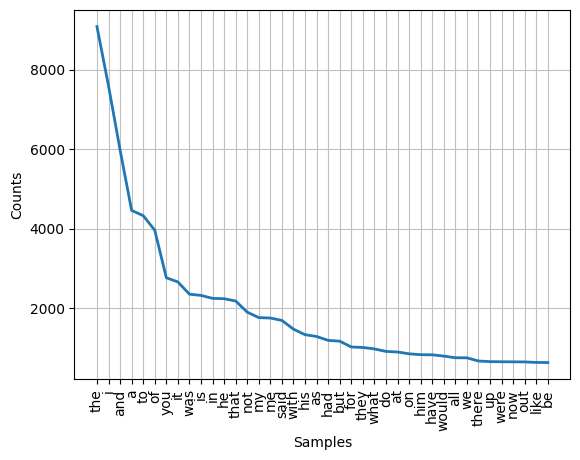

<Axes: xlabel='Samples', ylabel='Counts'>

In [9]:
#to get the graphical presentation of frequency of tokens
T1_frequency_distribution_org.plot(40)

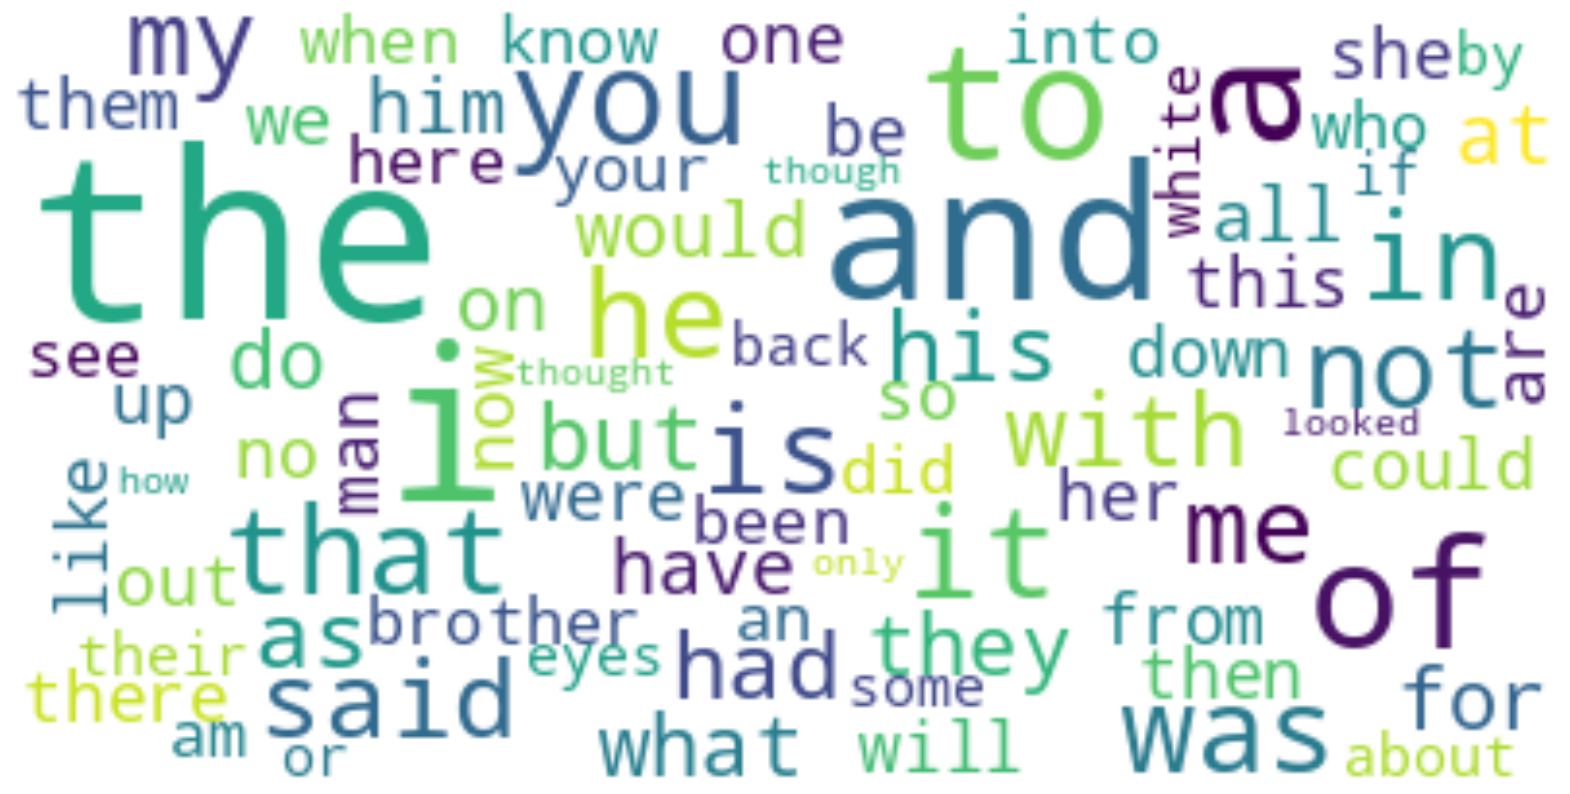

In [10]:
#Creating the wordcloud of these tokens
dictionary = Counter(T1_frequency_distribution)
cloud = WordCloud(max_font_size = 60, max_words = 80, background_color = "white").generate_from_frequencies(dictionary)
plt.figure(figsize = (20, 20))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [11]:
nltk.download('stopwords')
#Removing stopwords from T1\
remove_these = set(stopwords.words('english'))
Cleaned_T1 = [w for w in before_stop_words if not w in remove_these]
Cleaned_T1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['invisible',
 'man',
 'ralph',
 'ellison',
 'abebook',
 'v30',
 'notes',
 'eof',
 'back',
 'cover',
 'winner',
 'national',
 'book',
 'award',
 'fiction',
 'acclaimed',
 'one',
 'thousand',
 ',',
 'nine',
 'hundred',
 'sixty-five',
 'book',
 'week',
 'poll',
 'two',
 'hundred',
 'prominent',
 'authors',
 'critics',
 'editors',
 'distinguished',
 'single',
 'work',
 'published',
 'last',
 'twenty',
 'years',
 'unlike',
 'novel',
 'ever',
 'read',
 'richly',
 'comic',
 'deeply',
 'tragic',
 'profoundly',
 'soulsearching',
 'story',
 'one',
 'young',
 'negro',
 'baffling',
 'experiences',
 'road',
 'selfdiscovery',
 'bizarre',
 'encounter',
 'white',
 'trustee',
 'results',
 'expulsion',
 'southern',
 'college',
 'powerful',
 'culmination',
 'new',
 'york',
 'harlem',
 'story',
 'moves',
 'relentless',
 'drive',
 'nightmarish',
 'job',
 'paint',
 'factory',
 'bitter',
 'disillusionment',
 'brotherhood',
 'policy',
 'betrayal',
 'violent',
 'climax',
 'screaming',
 'tensions',
 'released'

In [12]:
#Frequency distribution of word tokens after removing stop words
T1_frequency_distribution_withoutstopwords = FreqDist(Cleaned_T1)
T1_frequency_distribution_withoutstopwords

FreqDist({'said': 1688, 'would': 790, 'like': 631, 'man': 624, 'one': 556, 'could': 532, 'brother': 468, 'see': 441, 'know': 415, 'back': 384, ...})

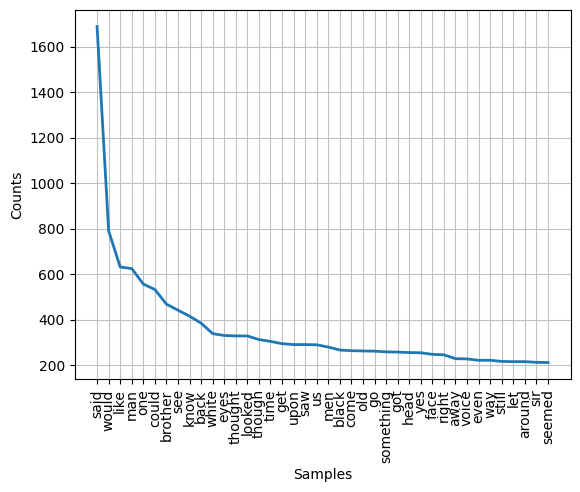

<Axes: xlabel='Samples', ylabel='Counts'>

In [13]:

#Graphical representation of frequency distribution after removing stop words
T1_frequency_distribution_withoutstopwords.plot(40)

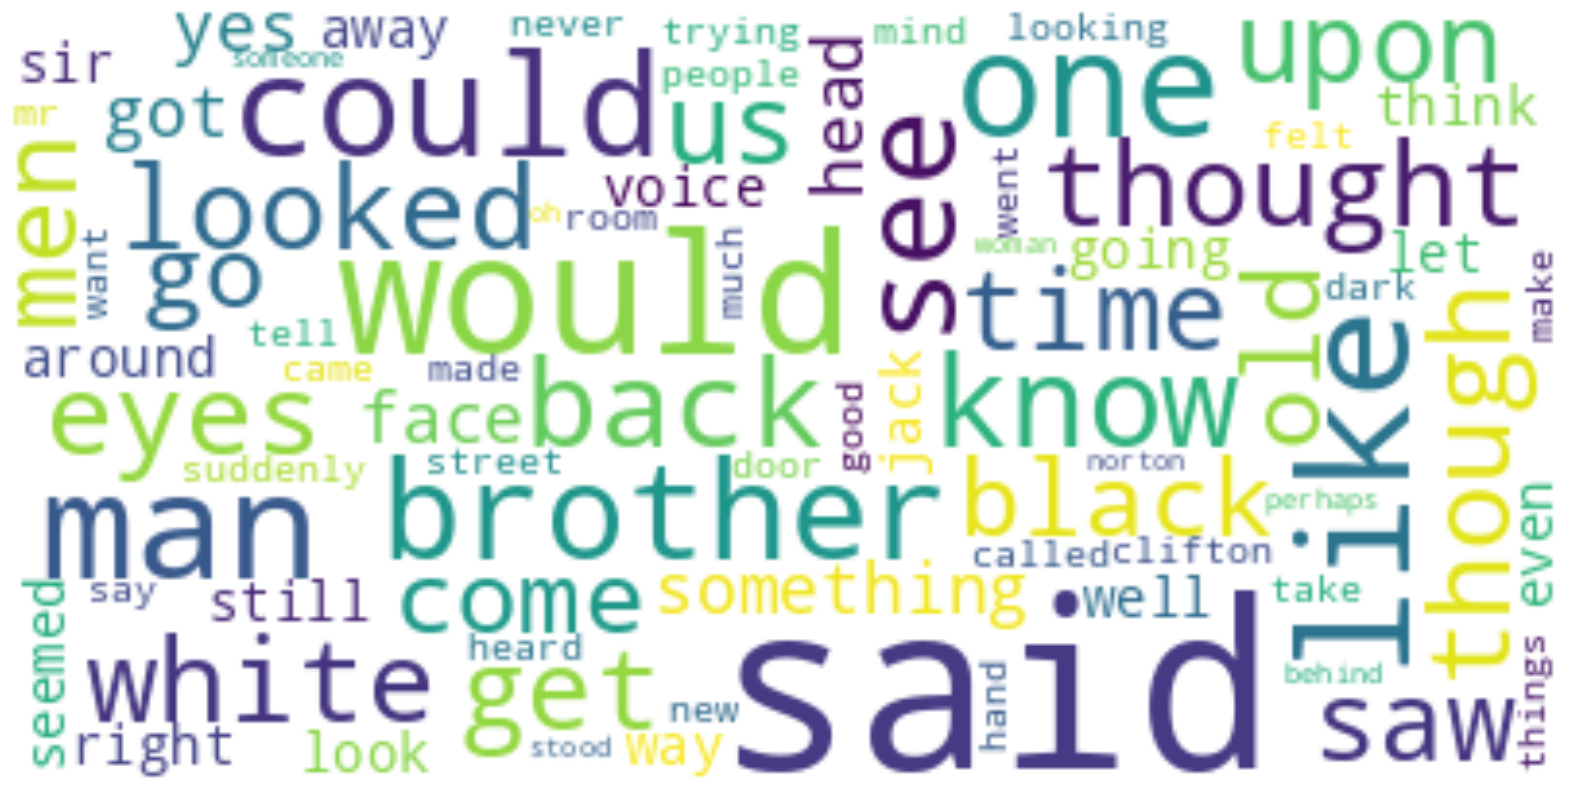

In [14]:
#Creating word cloud of tokens after removinbg stop words
dictionary = Counter(Cleaned_T1)
cloud = WordCloud(max_font_size = 60, max_words = 80, background_color = "white").generate_from_frequencies(dictionary)
plt.figure(figsize = (20, 20))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [15]:
#Evaluating frequency on basis of word length with stop words
length_frequency_T1 = {}
for i, j in T1_frequency_distribution_org.items():
        x = len(i)
        if(x in length_frequency_T1):
            length_frequency_T1[x] += j
        else:
            length_frequency_T1[x] = j


length_frequency_T1 = OrderedDict(sorted(length_frequency_T1.items()))
length_frequency_T1

OrderedDict([(1, 12103),
             (2, 31577),
             (3, 42663),
             (4, 34956),
             (5, 19195),
             (6, 13960),
             (7, 11969),
             (8, 6637),
             (9, 3952),
             (10, 2048),
             (11, 1244),
             (12, 601),
             (13, 288),
             (14, 133),
             (15, 30),
             (16, 20),
             (17, 7),
             (18, 9),
             (19, 2),
             (20, 1),
             (22, 1),
             (24, 1),
             (25, 1),
             (26, 1),
             (27, 1),
             (30, 1),
             (33, 2),
             (37, 1),
             (73, 1)])

In [16]:
#Evaluating frequency on basis of word length without stop words
Length_frequency_T1_withoutstopwords={}
for i, j in T1_frequency_distribution_withoutstopwords.items():
        x = len(i)
        if(x in Length_frequency_T1_withoutstopwords):
            Length_frequency_T1_withoutstopwords[x] += j
        else:
            Length_frequency_T1_withoutstopwords[x] = j


Length_frequency_T1_withoutstopwords = OrderedDict(sorted(Length_frequency_T1_withoutstopwords.items()))
Length_frequency_T1_withoutstopwords

OrderedDict([(1, 27),
             (2, 1270),
             (3, 8280),
             (4, 19975),
             (5, 16000),
             (6, 13285),
             (7, 11181),
             (8, 6601),
             (9, 3937),
             (10, 2016),
             (11, 1244),
             (12, 601),
             (13, 288),
             (14, 133),
             (15, 30),
             (16, 20),
             (17, 7),
             (18, 9),
             (19, 2),
             (20, 1),
             (22, 1),
             (24, 1),
             (25, 1),
             (26, 1),
             (27, 1),
             (30, 1),
             (33, 2),
             (37, 1),
             (73, 1)])

In [17]:
#Doing PoS tagging for T1 (using Penn Treebank Tagset) and obtaining distribution of tags for it \n",
nltk.download('averaged_perceptron_tagger')
tokenized = sent_tokenize(text)
for i in tokenized:

    # Word tokenizers is used to find the words
    # and punctuation in a string
    wordsList = nltk.word_tokenize(i)

    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w in remove_these]

    #  Using a Tagger. Which is part-of-speech
    # tagger or POS-tagger.
    tagged = nltk.pos_tag(wordsList)

    print(tagged)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('invisible', 'JJ'), ('man', 'NN'), ('ralph', 'VBZ'), ('ellison', 'JJ'), ('abebook', 'NN'), ('v30', 'NN'), ('notes', 'NNS'), ('eof', 'VBP'), ('back', 'RB'), ('cover', 'JJ'), ('winner', 'NN'), ('national', 'JJ'), ('book', 'NN'), ('award', 'NN'), ('fiction', 'NN'), ('acclaimed', 'VBD'), ('one', 'CD'), ('thousand', 'NN'), (',', ','), ('nine', 'CD'), ('hundred', 'VBD'), ('sixty-five', 'JJ'), ('book', 'NN'), ('week', 'NN'), ('poll', 'NN'), ('two', 'CD'), ('hundred', 'VBD'), ('prominent', 'JJ'), ('authors', 'NNS'), ('critics', 'NNS'), ('editors', 'NNS'), ('distinguished', 'VBD'), ('single', 'JJ'), ('work', 'NN'), ('published', 'VBN'), ('last', 'JJ'), ('twenty', 'CD'), ('years', 'NNS'), ('unlike', 'IN'), ('novel', 'JJ'), ('ever', 'RB'), ('read', 'VBP'), ('richly', 'RB'), ('comic', 'JJ'), ('deeply', 'NN'), ('tragic', 'JJ'), ('profoundly', 'RB'), ('soulsearching', 'VBG'), ('story', 'NN'), ('one', 'CD'), ('young', 'JJ'), ('negro', 'NN'), ('baffling', 'VBG'), ('experiences', 'NNS'), ('road', 'NN

In [18]:
words= [word_tokenize(i) for i in sent_tokenize(text)]
pos_tag= [nltk.pos_tag(i) for i in words]

tag_frequency_distribution = {}
for sent in pos_tag:
    for word, tag in sent:
        if tag in tag_frequency_distribution:
            tag_frequency_distribution[tag] += 1
        else:
            tag_frequency_distribution[tag] = 1
tag_frequency_distribution = OrderedDict(sorted(tag_frequency_distribution.items(), key=lambda item: item[1], reverse = True))
print(tag_frequency_distribution)

OrderedDict([('NN', 31394), ('IN', 20366), ('DT', 17261), ('PRP', 13848), ('VBD', 13606), ('JJ', 12541), ('RB', 11573), ('VB', 8697), ('CC', 7625), ('NNS', 7162), ('VBP', 5299), ('VBG', 5298), ('PRP$', 4771), ('TO', 4329), ('VBN', 4251), ('VBZ', 3624), ('MD', 2582), ('WP', 1413), ('RP', 1302), ('WRB', 1274), ('WDT', 782), ('CD', 773), ('EX', 456), ('JJR', 372), ('RBR', 215), ('PDT', 203), ('JJS', 174), ('UH', 78), ('RBS', 68), ('FW', 32), ('WP$', 20), (',', 10), ('NNP', 3), ('NNPS', 2), ('$', 1)])


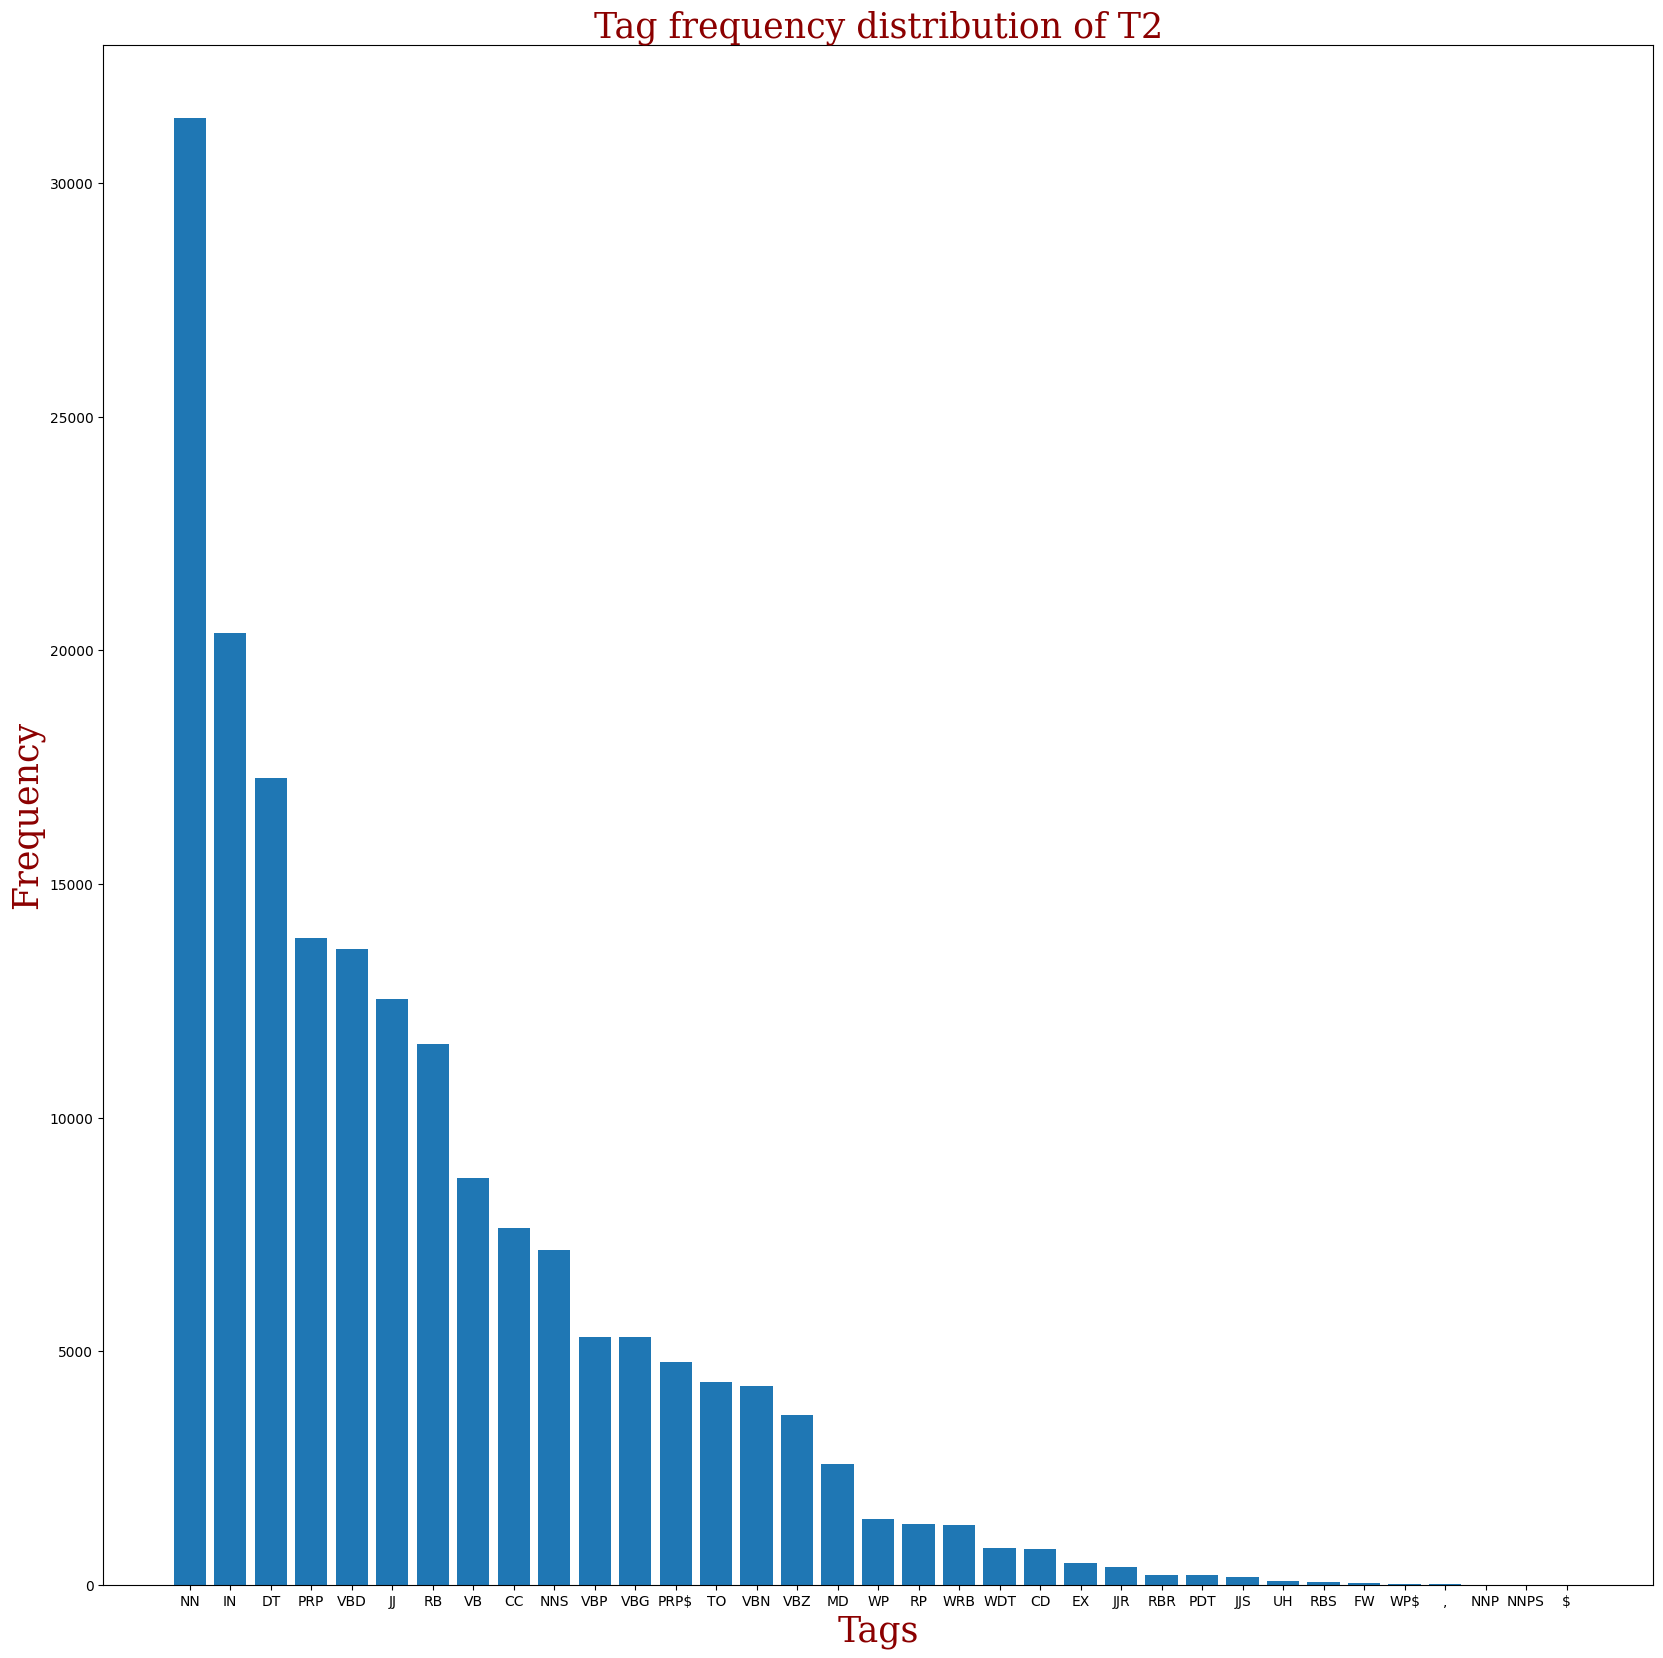

In [19]:
# Plotting tag frequency distribution of T2
plt.figure(figsize = (20, 20))

plt.bar(range(len(tag_frequency_distribution)), list(tag_frequency_distribution.values()), align = 'center')

plt.xticks(range(len(tag_frequency_distribution)), list(tag_frequency_distribution.keys()))
font = {'family':'serif','color':'darkred','size':25}

plt.title("Tag frequency distribution of T2", fontdict = font, loc = "center")
plt.xlabel("Tags", fontdict = font)
plt.ylabel("Frequency", fontdict = font)

plt.show()

In [20]:
#longest chapter24
longest_chap=txt_file_to_string("chapter24.txt")
longest_chap=pre_process(longest_chap)
longest_chap=convert_number(longest_chap)
longest_chap

'i started yessing them the next day and it began beautifully the community was still going apart at the seams crowds formed at the slightest incidents store windows were smashed and several clashes erupted during the morning between bus drivers and their passengers the papers listed similar incidents that had exploded during the night the mirrored fade of one store on 125th street was smashed and i passed to see a group of boys watching their distorted images as they danced before the jagged glass a group of adults looked on refusing to move at the policemen is command and muttering about clifton i did not like the look of things for all my wish to see the committee confounded when i reached the office members were there with reports of clashes in other parts of the district i did not like it at all the violence was pointless and helped along by ras was actually being directed against the community itself yet in spite of my sense of violated responsibility i was pleased by the develop

In [21]:
import itertools

def pairwise(s):
    a,b = itertools.tee(s)
    next(b)
    return zip(a,b)
counts = [[0 for _ in range(100)] for _ in range(100)]  # nothing has occurred yet
with open('chapter24.txt') as infile:
    for a,b in pairwise(char for line in infile for word in line.split() for char in word):  # get pairwise characters from the text
        given = ord(a) - ord('a')  # index (in `counts`) of the "given" character
        char = ord(b) - ord('a')   # index of the character that follows the "given" character
        counts[given][char] += 1

# now that we have the number of occurrences, let's divide by the totals to get conditional probabilities

totals = [sum(count[i] for i in range(100)) for count in counts]
for given in range(100):
    if not totals[given]:
        continue
    for i in range(len(counts[given])):
        counts[given][i] /= totals[given]

counts

[[0.000980392156862745,
  0.030392156862745098,
  0.04068627450980392,
  0.058333333333333334,
  0.0004901960784313725,
  0.006862745098039216,
  0.027450980392156862,
  0.005392156862745098,
  0.08431372549019608,
  0.000980392156862745,
  0.014705882352941176,
  0.06323529411764706,
  0.029901960784313727,
  0.1892156862745098,
  0.0004901960784313725,
  0.01715686274509804,
  0.0,
  0.08872549019607844,
  0.12009803921568628,
  0.12794117647058822,
  0.018627450980392157,
  0.020098039215686276,
  0.0196078431372549,
  0.0024509803921568627,
  0.025490196078431372,
  0.000980392156862745,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0004901960784313725,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0014705882352941176,
  0.0,
  0.0004901960784313725,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0004901960784313725,
  0.0,
  0.0,
  0.0,
  0.00196078431372549,
  0.0,
  0.0,
  0.0,
  0.0

In [22]:
import pandas as pd
print(pd.DataFrame(counts))

          0         1         2         3         4         5         6   \
0   0.000980  0.030392  0.040686  0.058333  0.000490  0.006863  0.027451   
1   0.069114  0.032397  0.000000  0.002160  0.278618  0.000000  0.000000   
2   0.154000  0.000000  0.012000  0.000000  0.140000  0.000000  0.000000   
3   0.094625  0.023467  0.012869  0.027252  0.100681  0.019682  0.012869   
4   0.087846  0.014798  0.030227  0.122796  0.031171  0.017947  0.011020   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
96  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
97  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
98  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
99  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9   ...        90   91   92   93   94   95   96  \
0   0.

In [23]:
chap=txt_file_to_string("chapter1.txt")
chap=pre_process(chap)
chap=convert_number(chap)
before_stop_words=word_tokenize(chap)
before_stop_words

['it',
 'goes',
 'a',
 'long',
 'way',
 'back',
 'some',
 'twenty',
 'years',
 'all',
 'my',
 'life',
 'i',
 'had',
 'been',
 'looking',
 'for',
 'something',
 'and',
 'everywhere',
 'i',
 'turned',
 'someone',
 'tried',
 'to',
 'tell',
 'me',
 'what',
 'it',
 'was',
 'i',
 'accepted',
 'their',
 'answers',
 'too',
 'though',
 'they',
 'were',
 'often',
 'in',
 'contradiction',
 'and',
 'even',
 'selfcontradictory',
 'i',
 'was',
 'nae',
 'i',
 'was',
 'looking',
 'for',
 'myself',
 'and',
 'asking',
 'everyone',
 'except',
 'myself',
 'questions',
 'which',
 'i',
 'and',
 'only',
 'i',
 'could',
 'answer',
 'it',
 'took',
 'me',
 'a',
 'long',
 'time',
 'and',
 'much',
 'painful',
 'boomeranging',
 'of',
 'my',
 'expectations',
 'to',
 'achieve',
 'a',
 'realization',
 'everyone',
 'else',
 'appears',
 'to',
 'have',
 'been',
 'born',
 'with',
 'that',
 'i',
 'am',
 'nobody',
 'but',
 'myself',
 'but',
 'first',
 'i',
 'had',
 'to',
 'discover',
 'that',
 'i',
 'am',
 'an',
 'invisibl

In [24]:
from collections import Counter
import random

def generate_bigram_probabilities(text):
    words = text.split()
    bigrams = [(words[i], words[i + 1]) for i in range(len(words) - 1)]
    bigram_counts = Counter(bigrams)
    total_bigrams = len(bigrams)
    bigram_probabilities = {bigram: count / total_bigrams for bigram, count in bigram_counts.items()}
    return bigram_probabilities


In [25]:
def predict_next_word(sentence, bigram_probabilities):
    words = sentence.split()


    last_word = words[-1]

    # Find possible next words based on the last word of the input
    possible_next_words = [bigram[1] for bigram in bigram_probabilities if bigram[0] == last_word]

    if not possible_next_words:
        return "No prediction available."

    # Predict the next word based on the probabilities
    probabilities = [bigram_probabilities.get((last_word, word), 0) for word in possible_next_words]
    next_word = random.choices(possible_next_words, probabilities)[0]

    return next_word

In [26]:
bigram_probabilities = generate_bigram_probabilities(chap)
input_sentence = "I was in the"
next_word_prediction = predict_next_word(input_sentence, bigram_probabilities)
input_sentence+=" "
input_sentence+=next_word_prediction
input_sentence


'I was in the hand'

In [27]:
input_sentence = "I am not ashamed of my"
next_word_prediction = predict_next_word(input_sentence, bigram_probabilities)
input_sentence+=" "
input_sentence+=next_word_prediction
input_sentence

'I am not ashamed of my eye'

In [28]:
# input_text = "this is an example"


input_sentence = "I want you to"
next_word_prediction = predict_next_word(input_sentence, bigram_probabilities)
# print(f"The predicted next word is: {next_word_prediction}")
input_sentence+=" "
input_sentence+=next_word_prediction
input_sentence

'I want you to deliver'

In [29]:
#original- I was in the cards
#predicted- I was in the group

In [30]:
#original- I am not ashamed of my grandparents
#predicted- I am not ashamed of my ears

In [31]:
#original- I want you to overcome
#predicted-I want you to act

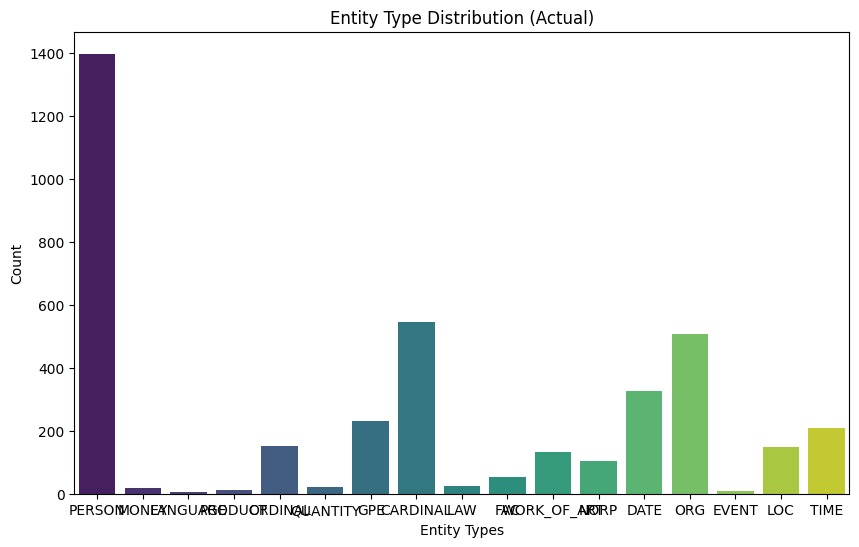

In [157]:
import spacy
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load spaCy English model for NER
nlp = spacy.load("en_core_web_sm")

# Read the content of the chapter.txt file
with open('InvisibleMan.txt', 'r', encoding='utf-8') as file:
    chapter_text = file.read()

# Process the text with spaCy
doc = nlp(chapter_text)

# Extract entities and their types from spaCy
predicted_entities = [(ent.text, ent.label_) for ent in doc.ents]

# Extract all entity types found by spaCy
all_entity_types_spacy = set([ent.label_ for ent in doc.ents])

# Visualization of entity types based on actual entities present
entity_type_counts_spacy = {label: 0 for label in all_entity_types_spacy}
for label in [ent.label_ for ent in doc.ents]:
    entity_type_counts_spacy[label] += 1

# Convert to lists
entity_types_spacy, counts_spacy = zip(*entity_type_counts_spacy.items())
entity_types_spacy = list(entity_types_spacy)
counts_spacy = list(counts_spacy)
plt.figure(figsize=(10, 6))
sns.barplot(x=entity_types_spacy, y=counts_spacy, palette="viridis")
plt.title("Entity Type Distribution (Actual)")
plt.xlabel("Entity Types")
plt.ylabel("Count")
plt.show()

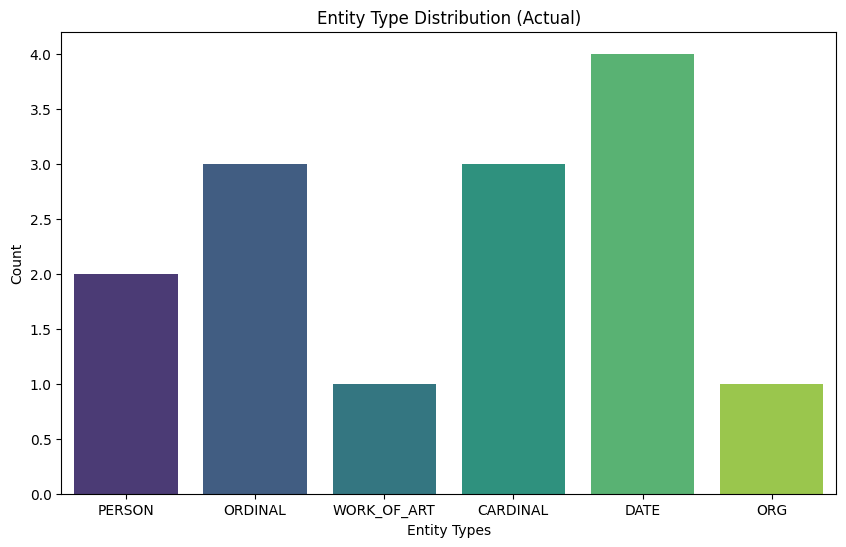

Accuracy: 0.9286
F1 Score: 0.9048


In [150]:
import spacy
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load spaCy English model for NER
nlp = spacy.load("en_core_web_sm")

# Read the content of the chapter.txt file
with open('passage.txt', 'r', encoding='utf-8') as file:
    chapter_text = file.read()

# Process the text with spaCy
doc = nlp(chapter_text)

# Extract entities and their types from spaCy
predicted_entities = [(ent.text, ent.label_) for ent in doc.ents]

# Extract all entity types found by spaCy
all_entity_types_spacy = set([ent.label_ for ent in doc.ents])

# Visualization of entity types based on actual entities present
entity_type_counts_spacy = {label: 0 for label in all_entity_types_spacy}
for label in [ent.label_ for ent in doc.ents]:
    entity_type_counts_spacy[label] += 1

# Convert to lists
entity_types_spacy, counts_spacy = zip(*entity_type_counts_spacy.items())
entity_types_spacy = list(entity_types_spacy)
counts_spacy = list(counts_spacy)
plt.figure(figsize=(10, 6))
sns.barplot(x=entity_types_spacy, y=counts_spacy, palette="viridis")
plt.title("Entity Type Distribution (Actual)")
plt.xlabel("Entity Types")
plt.ylabel("Count")
plt.show()

# Manual labeling of entities (replace 'PERSON', 'ACTION', etc. with actual labels)
# Example: [('entity_text', 'MANUAL_LABEL'), ...]
manual_labels = [
    ("some twenty years", "DATE"),
 ("eighty-five years ago", "DATE"),
 ("one", "CARDINAL"),
 ("About eighty-five years ago", "CARDINAL"),
 ("Son", "PERSON"),
 ("days", "DATE"),
 ("Reconstruction", "ORG"),
 ("Learn", "WORK_OF_ART"),
 ("first", "ORDINAL"),
 ("some day", "DATE"),
 ("first", "ORDINAL"),
 ("three", "CARDINAL"),
 ("fourth", "ORDINAL")]
manual_label2=[
 ("nine", "CARDINAL"),
 ("one", "CARDINAL"),
 ("night", "TIME"),
 ("one", "CARDINAL"),
 ("East Indian", "NORP"),
 ("American", "NORP"),
 ("a hundred", "CARDINAL"),
 ("one", "CARDINAL"),
 ("two", "CARDINAL"),
 ("moans", "NORP"),
 ("Chairs", "PERSON"),
 ("ten", "CARDINAL"),
 ("One", "CARDINAL"),
 ("one", "CARDINAL"),
 ("Jackson", "PERSON"),
 ("Jack", "PERSON"),
 ("first", "ORDINAL"),
 ("Jackson", "PERSON"),
 ("nine", "CARDINAL"),
 ("Jackson", "PERSON"),
 ("Mix", "PERSON"),
 ("Two", "CARDINAL"),
 ("three", "CARDINAL"),
 ("four", "CARDINAL"),
 ("one", "CARDINAL"),
 ("one", "CARDINAL"),
 ("three minute", "TIME")]
manual_label3=[
 ("Slug", "PERSON"),
 ("two", "CARDINAL"),
 ("two", "CARDINAL"),
 ("two", "CARDINAL"),
 ("Tatlock", "GPE"),
 ("Tatlock", "NORP"),
 ("half", "CARDINAL"),
 ("Tatlock", "GPE"),
 ("five dollars", "MONEY"),
 ("Seven", "CARDINAL"),
 ("FIVE", "CARDINAL"),
 ("One", "CARDINAL"),
 ("M.C.", "GPE"),
 ("Sambo", "ORG"),
 ("Ready", "WORK_OF_ART"),
 ("M.C.", "GPE"),
 ("American", "NORP"),
 ("Leggo", "ORG"),
 ("Leggo", "ORG"),
 ("Colcord", "PERSON"),
 ("a whole century", "DATE"),
 ("a century", "DATE"),
 ("M.C.", "GPE"),
 ("M.C.", "GPE"),
 ("five dollars", "MONEY"),
 ("Tatlock", "GPE"),
 ("ten", "CARDINAL"),
 ("M.C.", "GPE"),
 ("yesterday", "DATE"),
 ("Greenwood", "PERSON"),
 ("first", "ORDINAL"),
 ("many days", "DATE"),
 ("the Amazon River", "LOC")]

# Compare manually labeled entities with predicted entities
y_true = [label[1] for label in manual_labels]
y_pred = [label[1] for label in predicted_entities if label[1] in all_entity_types_spacy]

# Ensure lengths are the same
max_len = max(len(y_true), len(y_pred))
y_true += [''] * (max_len - len(y_true))
y_pred += [''] * (max_len - len(y_pred))

# Calculate accuracy and F1 score
mlb = MultiLabelBinarizer()
y_true_bin = mlb.fit_transform([[label] for label in y_true])
y_pred_bin = mlb.transform([[label] for label in y_pred])

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_true_bin, y_pred_bin)
f1 = f1_score(y_true_bin, y_pred_bin, average='weighted')

# Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")




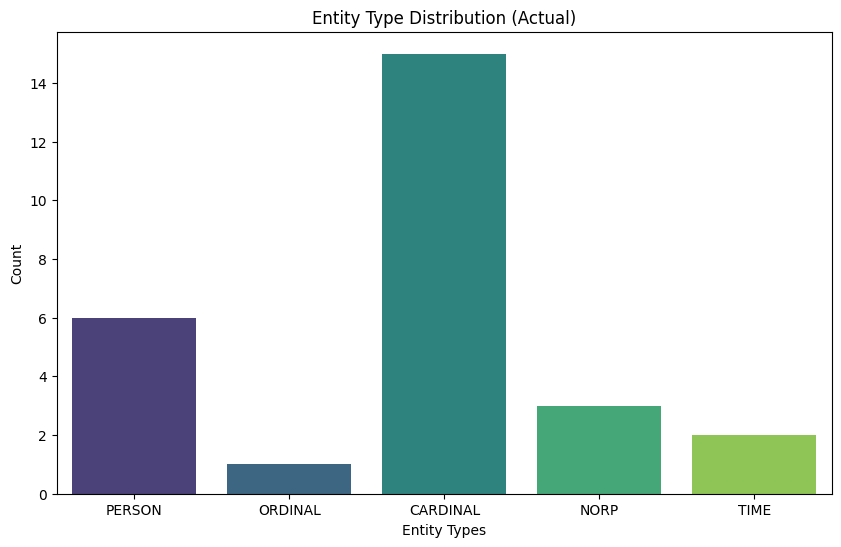

Accuracy: 0.9259
F1 Score: 0.8957


In [153]:
import spacy
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load spaCy English model for NER
nlp = spacy.load("en_core_web_sm")

# Read the content of the chapter.txt file
with open('passage2.txt', 'r', encoding='utf-8') as file:
    chapter_text = file.read()

# Process the text with spaCy
doc = nlp(chapter_text)

# Extract entities and their types from spaCy
predicted_entities = [(ent.text, ent.label_) for ent in doc.ents]

# Extract all entity types found by spaCy
all_entity_types_spacy = set([ent.label_ for ent in doc.ents])

# Visualization of entity types based on actual entities present
entity_type_counts_spacy = {label: 0 for label in all_entity_types_spacy}
for label in [ent.label_ for ent in doc.ents]:
    entity_type_counts_spacy[label] += 1

# Convert to lists
entity_types_spacy, counts_spacy = zip(*entity_type_counts_spacy.items())
entity_types_spacy = list(entity_types_spacy)
counts_spacy = list(counts_spacy)
plt.figure(figsize=(10, 6))
sns.barplot(x=entity_types_spacy, y=counts_spacy, palette="viridis")
plt.title("Entity Type Distribution (Actual)")
plt.xlabel("Entity Types")
plt.ylabel("Count")
plt.show()

# Manual labeling of entities (replace 'PERSON', 'ACTION', etc. with actual labels)
# Example: [('entity_text', 'MANUAL_LABEL'), ...]
manual_labels = [
    ("some twenty years", "DATE"),
 ("eighty-five years ago", "DATE"),
 ("one", "CARDINAL"),
 ("About eighty-five years ago", "CARDINAL"),
 ("Son", "PERSON"),
 ("days", "DATE"),
 ("Reconstruction", "ORG"),
 ("Learn", "WORK_OF_ART"),
 ("first", "ORDINAL"),
 ("some day", "DATE"),
 ("first", "ORDINAL"),
 ("three", "CARDINAL"),
 ("fourth", "ORDINAL")]
manual_label2=[
 ("nine", "CARDINAL"),
 ("one", "CARDINAL"),
 ("night", "TIME"),
 ("one", "CARDINAL"),
 ("East Indian", "NORP"),
 ("American", "NORP"),
 ("a hundred", "CARDINAL"),
 ("one", "CARDINAL"),
 ("two", "CARDINAL"),
 ("moans", "NORP"),
 ("Chairs", "PERSON"),
 ("ten", "CARDINAL"),
 ("One", "CARDINAL"),
 ("one", "CARDINAL"),
 ("Jackson", "PERSON"),
 ("Jack", "PERSON"),
 ("first", "ORDINAL"),
 ("Jackson", "PERSON"),
 ("nine", "CARDINAL"),
 ("Jackson", "PERSON"),
 ("Mix", "PERSON"),
 ("Two", "CARDINAL"),
 ("three", "CARDINAL"),
 ("four", "CARDINAL"),
 ("one", "CARDINAL")]
manual_label3=[
 ("Slug", "PERSON"),
 ("two", "CARDINAL"),
 ("two", "CARDINAL"),
 ("two", "CARDINAL"),
 ("Tatlock", "GPE"),
 ("Tatlock", "NORP"),
 ("half", "CARDINAL"),
 ("Tatlock", "GPE"),
 ("five dollars", "MONEY"),
 ("Seven", "CARDINAL"),
 ("FIVE", "CARDINAL"),
 ("One", "CARDINAL"),
 ("M.C.", "GPE"),
 ("Sambo", "ORG"),
 ("Ready", "WORK_OF_ART"),
 ("M.C.", "GPE"),
 ("American", "NORP"),
 ("Leggo", "ORG"),
 ("Leggo", "ORG"),
 ("Colcord", "PERSON"),
 ("a whole century", "DATE"),
 ("a century", "DATE"),
 ("M.C.", "GPE"),
 ("M.C.", "GPE"),
 ("five dollars", "MONEY"),
 ("Tatlock", "GPE"),
 ("ten", "CARDINAL"),
 ("M.C.", "GPE"),
 ("yesterday", "DATE"),
 ("Greenwood", "PERSON"),
 ("first", "ORDINAL"),
 ("many days", "DATE"),
 ("the Amazon River", "LOC")]

# Compare manually labeled entities with predicted entities
y_true = [label[1] for label in manual_label2]
y_pred = [label[1] for label in predicted_entities if label[1] in all_entity_types_spacy]

# Ensure lengths are the same
max_len = max(len(y_true), len(y_pred))
y_true += [''] * (max_len - len(y_true))
y_pred += [''] * (max_len - len(y_pred))

# Calculate accuracy and F1 score
mlb = MultiLabelBinarizer()
y_true_bin = mlb.fit_transform([[label] for label in y_true])
y_pred_bin = mlb.transform([[label] for label in y_pred])

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_true_bin, y_pred_bin)
f1 = f1_score(y_true_bin, y_pred_bin, average='weighted')

# Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")




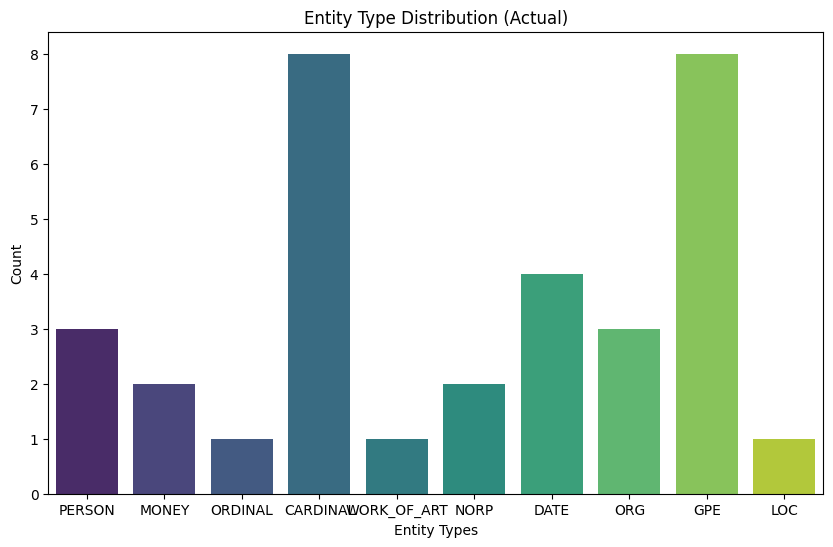

Accuracy: 0.9394
F1 Score: 0.9264


In [156]:
import spacy
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load spaCy English model for NER
nlp = spacy.load("en_core_web_sm")

# Read the content of the chapter.txt file
with open('passage3.txt', 'r', encoding='utf-8') as file:
    chapter_text = file.read()

# Process the text with spaCy
doc = nlp(chapter_text)

# Extract entities and their types from spaCy
predicted_entities = [(ent.text, ent.label_) for ent in doc.ents]

# Extract all entity types found by spaCy
all_entity_types_spacy = set([ent.label_ for ent in doc.ents])

# Visualization of entity types based on actual entities present
entity_type_counts_spacy = {label: 0 for label in all_entity_types_spacy}
for label in [ent.label_ for ent in doc.ents]:
    entity_type_counts_spacy[label] += 1

# Convert to lists
entity_types_spacy, counts_spacy = zip(*entity_type_counts_spacy.items())
entity_types_spacy = list(entity_types_spacy)
counts_spacy = list(counts_spacy)
plt.figure(figsize=(10, 6))
sns.barplot(x=entity_types_spacy, y=counts_spacy, palette="viridis")
plt.title("Entity Type Distribution (Actual)")
plt.xlabel("Entity Types")
plt.ylabel("Count")
plt.show()

# Manual labeling of entities (replace 'PERSON', 'ACTION', etc. with actual labels)
# Example: [('entity_text', 'MANUAL_LABEL'), ...]
manual_labels = [
    ("some twenty years", "DATE"),
 ("eighty-five years ago", "DATE"),
 ("one", "CARDINAL"),
 ("About eighty-five years ago", "CARDINAL"),
 ("Son", "PERSON"),
 ("days", "DATE"),
 ("Reconstruction", "ORG"),
 ("Learn", "WORK_OF_ART"),
 ("first", "ORDINAL"),
 ("some day", "DATE"),
 ("first", "ORDINAL"),
 ("three", "CARDINAL"),
 ("fourth", "ORDINAL")]
manual_label2=[
 ("nine", "CARDINAL"),
 ("one", "CARDINAL"),
 ("night", "TIME"),
 ("one", "CARDINAL"),
 ("East Indian", "NORP"),
 ("American", "NORP"),
 ("a hundred", "CARDINAL"),
 ("one", "CARDINAL"),
 ("two", "CARDINAL"),
 ("moans", "NORP"),
 ("Chairs", "PERSON"),
 ("ten", "CARDINAL"),
 ("One", "CARDINAL"),
 ("one", "CARDINAL"),
 ("Jackson", "PERSON"),
 ("Jack", "PERSON"),
 ("first", "ORDINAL"),
 ("Jackson", "PERSON"),
 ("nine", "CARDINAL"),
 ("Jackson", "PERSON"),
 ("Mix", "PERSON"),
 ("Two", "CARDINAL"),
 ("three", "CARDINAL"),
 ("four", "CARDINAL"),
 ("one", "CARDINAL")]
manual_label3=[
 ("Slug", "PERSON"),
 ("two", "CARDINAL"),
 ("two", "CARDINAL"),
 ("two", "CARDINAL"),
 ("Tatlock", "GPE"),
 ("Tatlock", "NORP"),
 ("half", "CARDINAL"),
 ("Tatlock", "GPE"),
 ("five dollars", "MONEY"),
 ("Seven", "CARDINAL"),
 ("FIVE", "CARDINAL"),
 ("One", "CARDINAL"),
 ("M.C.", "GPE"),
 ("Sambo", "ORG"),
 ("Ready", "WORK_OF_ART"),
 ("M.C.", "GPE"),
 ("American", "NORP"),
 ("Leggo", "ORG"),
 ("Leggo", "ORG"),
 ("Colcord", "PERSON"),
 ("a whole century", "DATE"),
 ("a century", "DATE"),
 ("M.C.", "GPE"),
 ("M.C.", "GPE"),
 ("five dollars", "MONEY"),
 ("Tatlock", "GPE"),
 ("ten", "CARDINAL"),
 ("M.C.", "GPE"),
 ("yesterday", "DATE"),
 ("Greenwood", "PERSON"),
 ("first", "ORDINAL"),
 ("the Amazon River", "LOC")]

# Compare manually labeled entities with predicted entities
y_true = [label[1] for label in manual_label3]
y_pred = [label[1] for label in predicted_entities if label[1] in all_entity_types_spacy]

# Ensure lengths are the same
max_len = max(len(y_true), len(y_pred))
y_true += [''] * (max_len - len(y_true))
y_pred += [''] * (max_len - len(y_pred))

# Calculate accuracy and F1 score
mlb = MultiLabelBinarizer()
y_true_bin = mlb.fit_transform([[label] for label in y_true])
y_pred_bin = mlb.transform([[label] for label in y_pred])

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_true_bin, y_pred_bin)
f1 = f1_score(y_true_bin, y_pred_bin, average='weighted')

# Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")




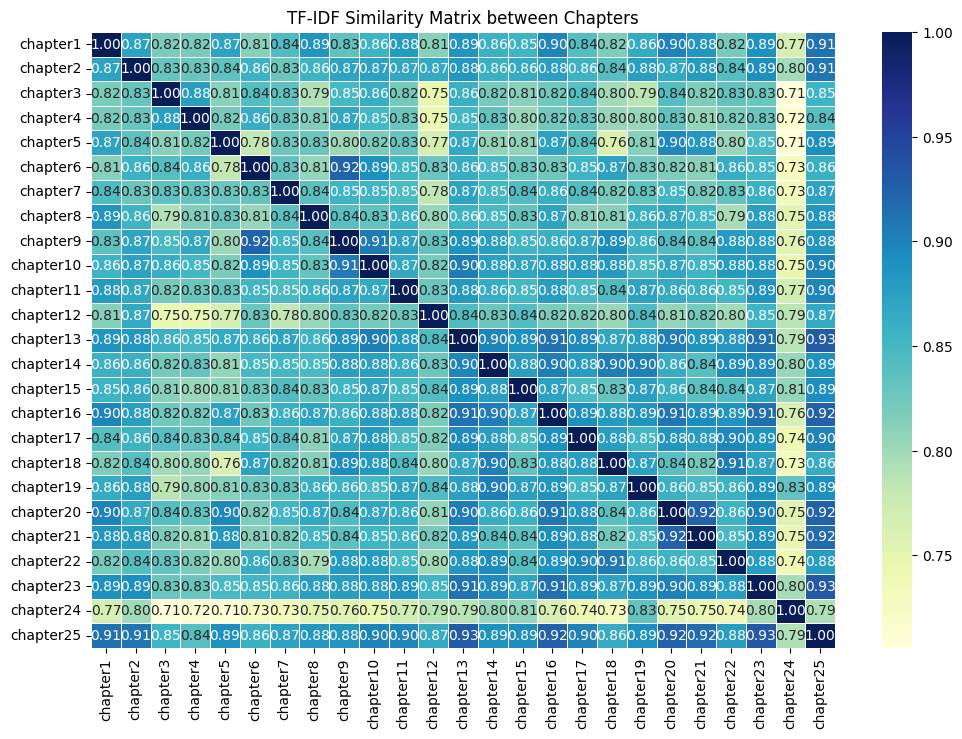

In [162]:
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to read a text file and return its content
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to preprocess text (you can customize this based on your requirements)
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = text.lower()  # Convert to lowercase
    return text


# List to store chapter names and corresponding TF-IDF vectors
chapter_names = []
tfidf_vectors = []

# Read and preprocess each chapter
for i in range(1, 26):
    with open(f'Chapter {i}.txt', 'r', encoding='utf-8') as file:
      chapter_content = file.read()


      preprocessed_content = preprocess_text(chapter_content)

      chapter_names.append(f'chapter{i}')
      tfidf_vectors.append(preprocessed_content)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF vectors for chapters
tfidf_matrix = vectorizer.fit_transform(tfidf_vectors)

# Calculate cosine similarity between chapters
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create a DataFrame for visualization
df_similarity = pd.DataFrame(similarity_matrix, index=chapter_names, columns=chapter_names)

# Visualize the similarity matrix as a gradient table
plt.figure(figsize=(12, 8))
sns.heatmap(df_similarity, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('TF-IDF Similarity Matrix between Chapters')
plt.show()
